Imports

In [119]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import metrics

Load data

In [120]:
data = pd.read_csv("preprocessed_data_two.csv")

Split dataset

In [121]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:34], data["class"], random_state=69, test_size=0.33)

Function to Plot Confusion Matrix

In [89]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(["Low", "High"]))
    plt.xticks(tick_marks, ["Low", "High"])
#     plt.yticks(tick_marks, [])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Function to plot ROC Curve

In [118]:
def plot_roc_curve(title, y_test, y_preds):
#     preds = y_score[:,1]
    fpr, tpr, threshold = roc_curve(np.array(y_test), y_preds)
    roc_auc = auc(fpr, tpr)
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Logistic Regression

In [131]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.75, penalty='l2',solver='saga',dual=False))),
        ('model', LogisticRegression(C=1.5,class_weight='balanced',solver='liblinear',max_iter=1500))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [132]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       755
           1       0.61      0.81      0.70       301

    accuracy                           0.80      1056
   macro avg       0.76      0.80      0.77      1056
weighted avg       0.83      0.80      0.81      1056



In [93]:
y_preds_LR=y_preds #Needed for plotting all roc curves together

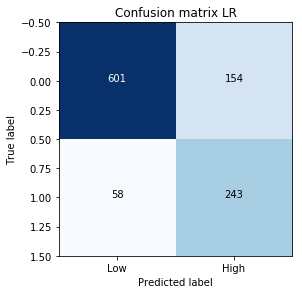

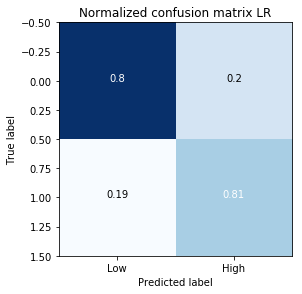

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix LR')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix LR')

plt.show()

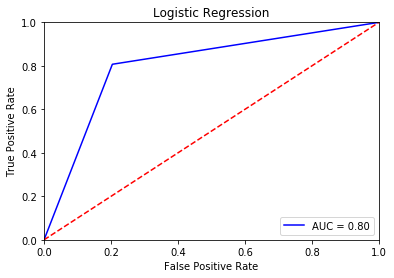

In [41]:
plot_roc_curve("Logistic Regression", y_test, y_preds)

Naive Bayes

In [94]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.75, penalty='l1', solver='liblinear',dual=False))),
        ('model', GaussianNB())])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [95]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       755
           1       0.66      0.76      0.71       301

    accuracy                           0.82      1056
   macro avg       0.78      0.80      0.79      1056
weighted avg       0.83      0.82      0.83      1056



In [96]:
y_preds_NB=y_preds

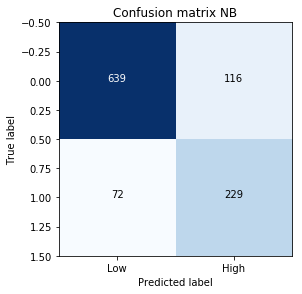

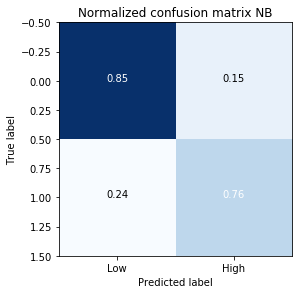

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix NB')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix NB')

plt.show()

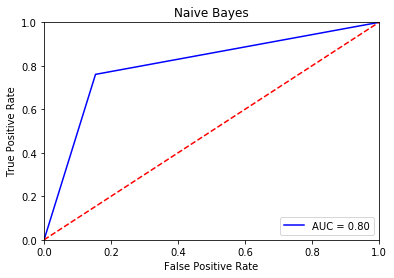

In [45]:
plot_roc_curve("Naive Bayes", y_test, y_preds)

SVM

In [97]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=1.5, penalty='l1',solver='liblinear', dual=False))),
        ('model', SVC(kernel='poly',coef0=0.5))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished


In [98]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       755
           1       0.74      0.70      0.72       301

    accuracy                           0.84      1056
   macro avg       0.81      0.80      0.81      1056
weighted avg       0.84      0.84      0.84      1056



In [99]:
y_preds_SVM=y_preds

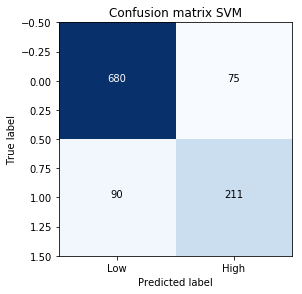

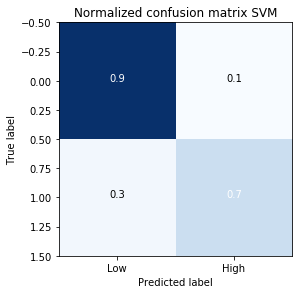

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix SVM')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix SVM')

plt.show()

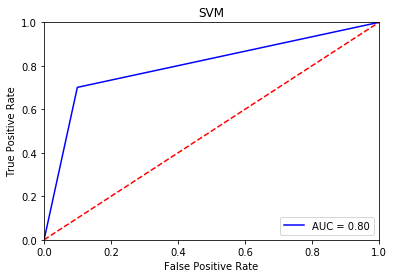

In [50]:
plot_roc_curve("SVM", y_test, y_preds)

Decision Tree

In [100]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.5, penalty='l1',solver='liblinear', dual=False))),
        ('model', DecisionTreeClassifier(criterion='entropy',min_samples_split=5))])
param_grid = [{}] 
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [101]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       755
           1       0.68      0.71      0.69       301

    accuracy                           0.82      1056
   macro avg       0.78      0.79      0.78      1056
weighted avg       0.82      0.82      0.82      1056



In [102]:
y_preds_DT=y_preds

[Text(151.59, 199.32, 'X[26] <= 0.271\nentropy = 0.866\nsamples = 2142\nvalue = [1526, 616]\nclass = y[0]'),
 Text(63.24, 163.07999999999998, 'X[18] <= 0.15\n0.28\n930\n[885, 45]\ny[0]'),
 Text(37.2, 126.83999999999999, 'X[24] <= 0.1\n0.751\n135\n[106, 29]\ny[0]'),
 Text(14.88, 90.6, 'X[1] <= 0.315\n0.659\n123\n[102, 21]\ny[0]'),
 Text(7.44, 54.359999999999985, '0.0\n27\n[27, 0]\ny[0]'),
 Text(22.32, 54.359999999999985, 'X[5] <= 0.169\n0.758\n96\n[75, 21]\ny[0]'),
 Text(14.88, 18.119999999999976, '\n  (...)  \n'),
 Text(29.76, 18.119999999999976, '\n  (...)  \n'),
 Text(59.52, 90.6, 'X[2] <= 0.3\n0.918\n12\n[4, 8]\ny[1]'),
 Text(52.080000000000005, 54.359999999999985, 'X[11] <= 0.424\n0.722\n5\n[4, 1]\ny[0]'),
 Text(44.64, 18.119999999999976, '\n  (...)  \n'),
 Text(59.52, 18.119999999999976, '\n  (...)  \n'),
 Text(66.96000000000001, 54.359999999999985, '0.0\n7\n[0, 7]\ny[1]'),
 Text(89.28, 126.83999999999999, 'X[15] <= 0.095\n0.142\n795\n[779, 16]\ny[0]'),
 Text(81.84, 90.6, '0.0\n37

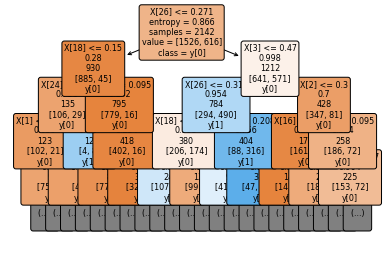

In [75]:
from sklearn import tree
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf.fit(X_train,y_train),filled=True,class_names=True,max_depth=4,label='root',rounded=True,fontsize=8)

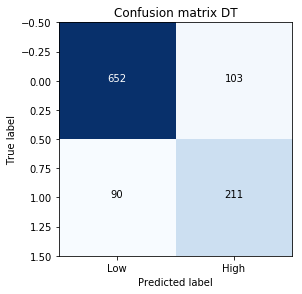

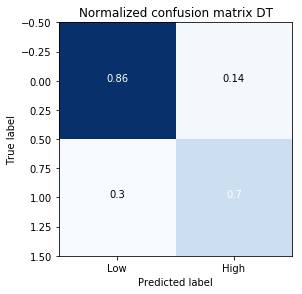

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix DT')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix DT')

plt.show()

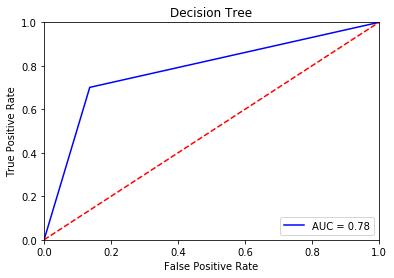

In [55]:
plot_roc_curve("Decision Tree", y_test, y_preds)

Random Forest

In [103]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.55,penalty='l1', solver='liblinear', dual=False, max_iter=2000))),
        ('model', RandomForestClassifier(criterion='entropy',n_estimators=500,class_weight='balanced',random_state=42,min_samples_split=3,bootstrap=False))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   6.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV] ................................................. , total=   6.6s
[CV]  ................................................................
[CV] ................................................. , total=   5.9s
[CV]  ................................................................
[CV] ................................................. , total=   6.6s
[CV]  ................................................................
[CV] ................................................. , total=   6.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.5s finished


In [104]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       755
           1       0.82      0.77      0.79       301

    accuracy                           0.89      1056
   macro avg       0.87      0.85      0.86      1056
weighted avg       0.88      0.89      0.89      1056



In [105]:
y_preds_RF=y_preds

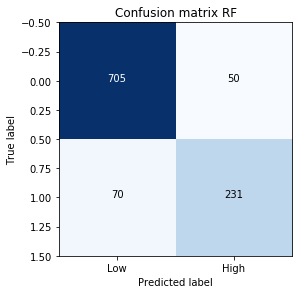

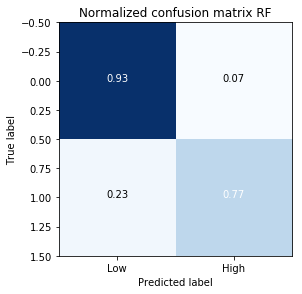

In [79]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix RF')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix RF')

plt.show()

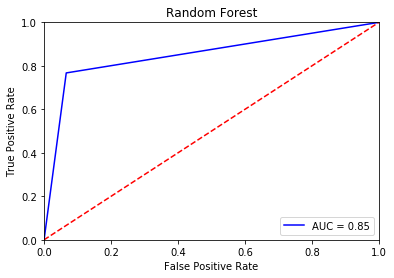

In [80]:
plot_roc_curve("Random Forest", y_test, y_preds)

Neural Network - Perceptron

In [106]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.75, penalty='l1',solver='liblinear', dual=False))),
        ('model', MLPClassifier(max_iter=1000,learning_rate='adaptive'))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   8.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV] ................................................. , total=  10.1s
[CV]  ................................................................
[CV] ................................................. , total=   4.9s
[CV]  ................................................................
[CV] ................................................. , total=  11.5s
[CV]  ................................................................
[CV] ................................................. , total=   5.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.1s finished


In [107]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       755
           1       0.74      0.67      0.71       301

    accuracy                           0.84      1056
   macro avg       0.81      0.79      0.80      1056
weighted avg       0.84      0.84      0.84      1056



In [108]:
y_preds_NN=y_preds

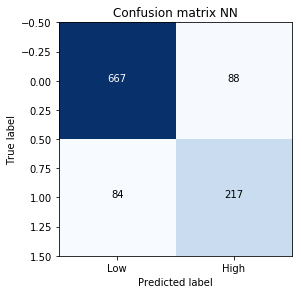

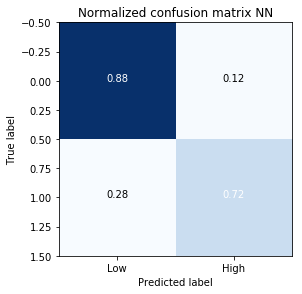

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix NN')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix NN')

plt.show()

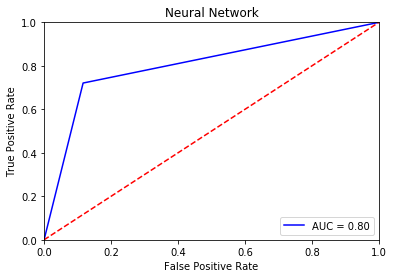

In [84]:
plot_roc_curve("Neural Network", y_test, y_preds)

Plot all ROC Curves together with AUC legend

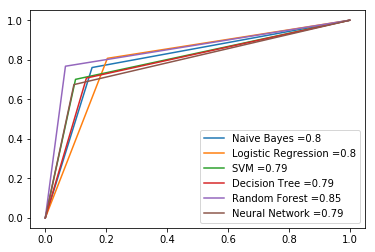

In [117]:
plt.figure(0).clf()

#Naive Bayes
fpr, tpr, thresh = metrics.roc_curve(y_test, y_preds_NB)
auc = metrics.roc_auc_score(y_test, y_preds_NB)
plt.plot(fpr,tpr,label="Naive Bayes ="+str(round(auc,2)))

#Logistic Regression
fpr, tpr, thresh = metrics.roc_curve(y_test, y_preds_LR)
auc = metrics.roc_auc_score(y_test, y_preds_LR)
plt.plot(fpr,tpr,label="Logistic Regression ="+str(round(auc,2)))

#SVM
fpr, tpr, thresh = metrics.roc_curve(y_test, y_preds_SVM)
auc = metrics.roc_auc_score(y_test, y_preds_DT)
plt.plot(fpr,tpr,label="SVM ="+str(round(auc,2)))

#Decision Tree
fpr, tpr, thresh = metrics.roc_curve(y_test, y_preds_DT)
auc = metrics.roc_auc_score(y_test, y_preds_DT)
plt.plot(fpr,tpr,label="Decision Tree ="+str(round(auc,2)))

#Random Forest
fpr, tpr, thresh = metrics.roc_curve(y_test, y_preds_RF)
auc = metrics.roc_auc_score(y_test, y_preds_RF)
plt.plot(fpr,tpr,label="Random Forest ="+str(round(auc,2)))

#Neural Network
fpr, tpr, thresh = metrics.roc_curve(y_test, y_preds_NN)
auc = metrics.roc_auc_score(y_test, y_preds_NN)
plt.plot(fpr,tpr,label="Neural Network ="+str(round(auc,2)))

plt.legend(loc=0)